# Loan Approval Prediction

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from pivottablejs import pivot_ui
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Exploratory Data Analysis

In [2]:
#  Load Data
data=pd.read_excel('modeldata.xlsx')
data=data.dropna()
X= data.drop(['Action Taken',"Approva1"], axis=1)
y=data["Approva1"]
df=pd.read_excel("Bi.xlsx")
df=df.dropna()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

### Respondents Profile

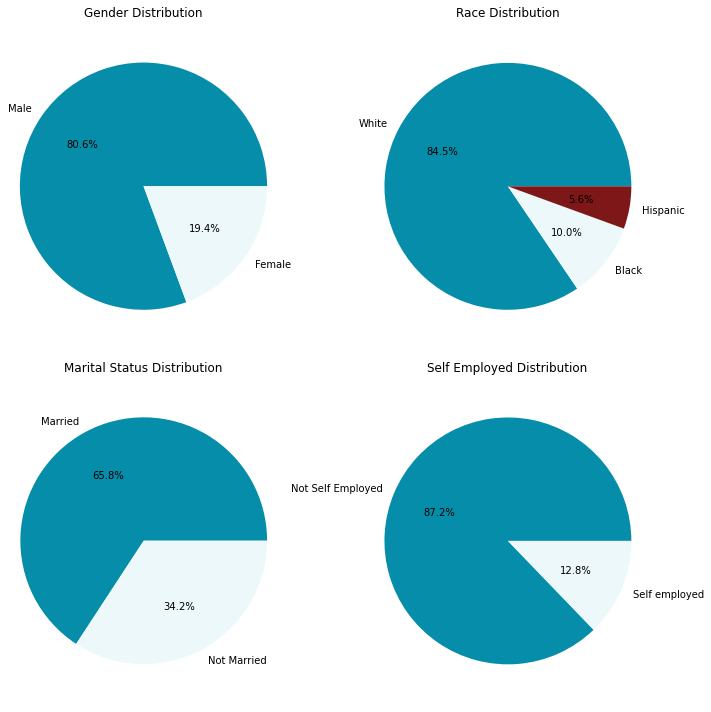

In [3]:
# Subset the DataFrame with selected columns
profile = df[['Gender', 'Race', 'Marital Status', 'Self Employed']]

# Set the number of columns and rows for subplots
num_cols = 2
num_rows = 2

# Define custom colors
colors = ['#068DA9', '#ECF8F9', '#7E1717', '#E55807']

# Create subplots with the specified number of columns and rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5))

# Iterate over the columns
for i, column in enumerate(profile.columns):
    # Count the occurrences of each value
    counts = profile[column].value_counts()

    # Calculate the current row and column indices
    row_index = i // num_cols
    col_index = i % num_cols

    # Create a pie chart in the corresponding subplot with custom colors
    axes[row_index, col_index].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)

    # Add a title
    axes[row_index, col_index].set_title(f'{column} Distribution')

    # Equal aspect ratio ensures that pie is drawn as a circle
    axes[row_index, col_index].axis('equal')

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()


### Distribution Curve 

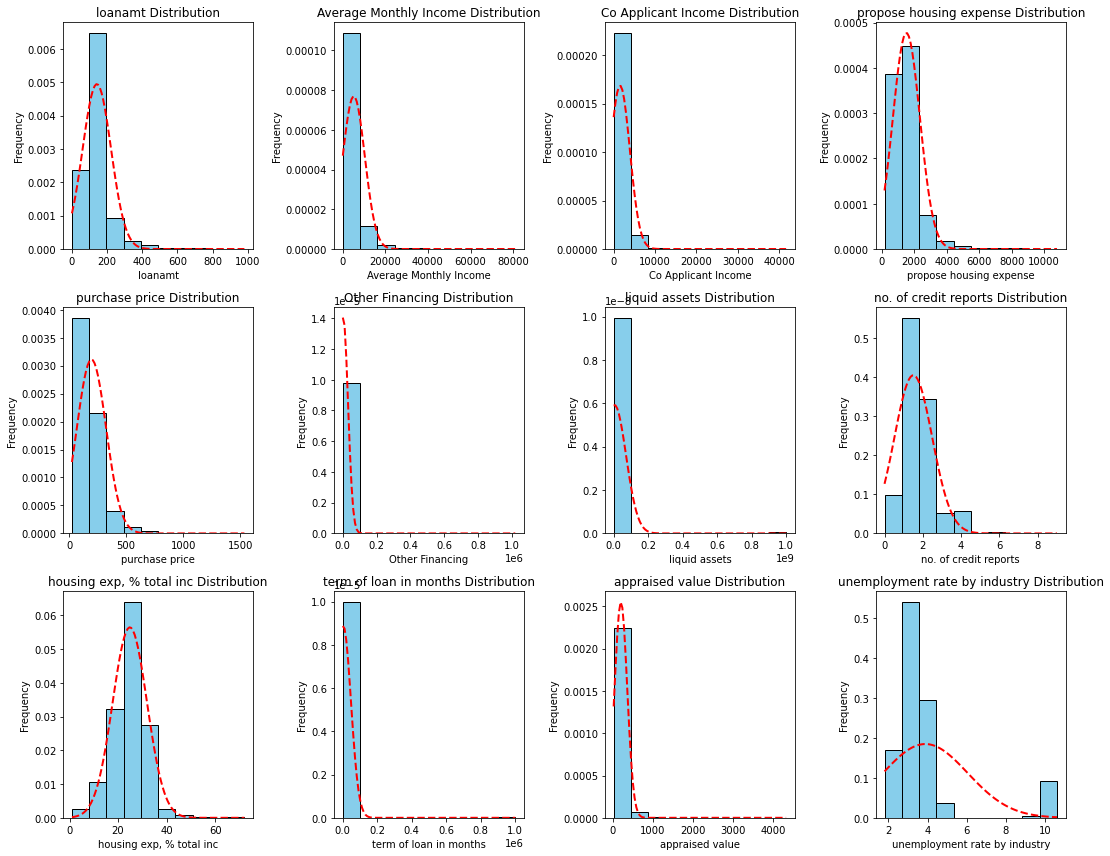

In [4]:
dist = df[['loanamt','Average Monthly Income', 'Co Applicant Income',
       'propose housing expense', 'purchase price', 'Other Financing',
       'liquid assets', 'no. of credit reports','housing exp, % total inc',
       'term of loan in months', 'appraised value',
       'unemployment rate by industry']]
num_cols = 4
num_rows = 3

# Calculate the number of plots
num_plots = num_cols * num_rows

# Create subplots with the specified number of columns and rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Iterate over the columns and plot each distribution
for i, column in enumerate(dist.columns):
    # Calculate the current row and column indices
    row_index = i // num_cols
    col_index = i % num_cols

    # Create a histogram with a line crossing through it
    ax = axes[row_index, col_index]
    ax.hist(dist[column], bins=10, color='skyblue', edgecolor='black', density=True)
    
    # Calculate the mean and standard deviation
    mean = dist[column].mean()
    std = dist[column].std()
    
    # Create a normal distribution line
    x = np.linspace(dist[column].min(), dist[column].max(), 100)
    y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    
    # Plot the normal distribution line
    ax.plot(x, y, color='red', linestyle='dashed', linewidth=2)
    
    # Add labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{column} Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Display the chart
plt.show()

### Correlation Matrix

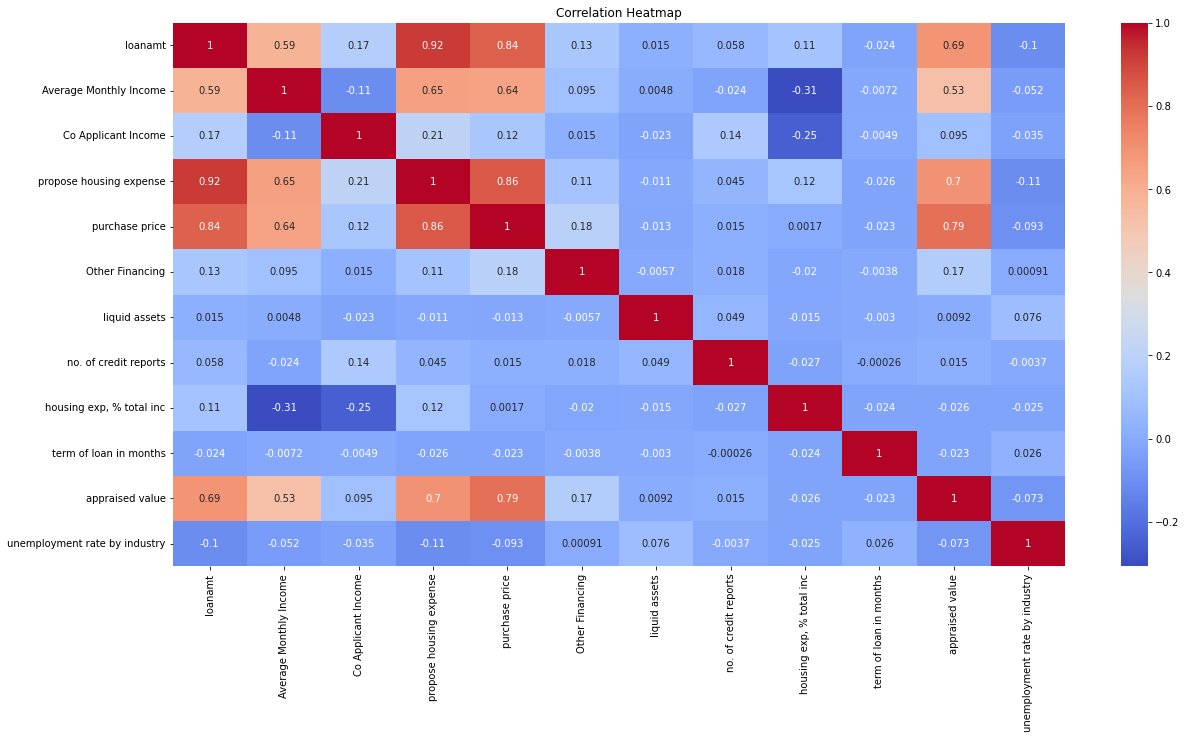

In [5]:

correlation_matrix = dist.corr()

# Set the size of the figure
plt.figure(figsize=(20, 10))

# Create a correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

### Pivot Table

In [6]:
pivot_ui(df)

## Machine Learning Models

In [49]:
data=pd.read_excel('modeldata.xlsx')
data=data.dropna()
X= data.drop(['Action Taken',"Approva1"], axis=1)
y=data["Approva1"]

### Model One: Logistic Regression  Model

In [50]:


# Assuming you have your data in X (features) and y (target variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of Logistic Regression classifier with increased max_iter and a different solver
classifier = LogisticRegression(max_iter=1000, solver='sag')

# Fit the model on the scaled training data
classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test_scaled)
# y_pred = classifier.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Print the predicted values
print(cm_df)
accuracy = accuracy_score(y_test, y_pred)
print("                         ")
print("---------------------------------------------------------------------")
print("                         ")
print(classification_report(y_test, classifier.predict(X_test_scaled)))
a=round(accuracy*100,1)
f' The model accuracy is {a}%'

                 Predicted Negative  Predicted Positive
Actual Negative                  17                  20
Actual Positive                  11                 308
                         
---------------------------------------------------------------------
                         
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        37
           1       0.94      0.97      0.95       319

    accuracy                           0.91       356
   macro avg       0.77      0.71      0.74       356
weighted avg       0.90      0.91      0.91       356



' The model accuracy is 91.3%'

### Model Two Decision Tree Model

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a decision tree classifier with pruning
clf = DecisionTreeClassifier(ccp_alpha=0)  # Adjust the ccp_alpha parameter to control pruning strength

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier


cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("Confusion Matrix:")
print(cm_df)
print("                         ")
print("---------------------------------------------------------------------")
print("                         ")
print(classification_report(y_test, clf.predict(X_test)))
accuracy = accuracy_score(y_test, y_pred)
a=round(accuracy*100,1)
f' The model accuracy is {a}%'

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                  18                  19
Actual Positive                  20                 299
                         
---------------------------------------------------------------------
                         
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        37
           1       0.94      0.94      0.94       319

    accuracy                           0.89       356
   macro avg       0.71      0.71      0.71       356
weighted avg       0.89      0.89      0.89       356



' The model accuracy is 89.0%'

In [55]:
train_accuracy=[]
test_accuracy=[]
for depth in range(1,10):
    model=model=DecisionTreeClassifier(max_depth=depth,random_state=10)
    model.fit(X_train,y_train)
    train_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))
graph_data=pd.DataFrame({"max_depth":range(1,10),"Train_acc":train_accuracy,"test_acc":test_accuracy})

Text(0, 0.5, 'Performance')

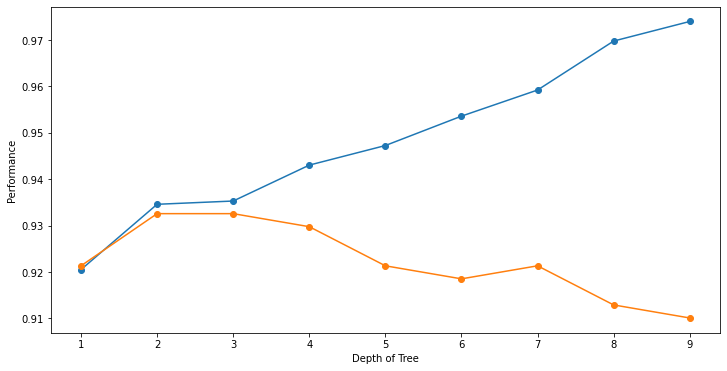

In [56]:
plt.figure(figsize=(12,6))
plt.plot(graph_data['max_depth'],graph_data['Train_acc'],marker="o")
plt.plot(graph_data['max_depth'],graph_data['test_acc'],marker="o")
plt.xlabel("Depth of Tree")
plt.ylabel("Performance")
# plt.legend()


### Model Threes: XG Boost Model

In [57]:
import xgboost as xgb
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

param={
    "max_depth":10,
    "eta":0.3,
    "num_class":2,
    "objective":"multi:softmax"
}
num_boost_round = 100

xgbmodel=xgb.train(param,train,num_boost_round=num_boost_round)
predict=xgbmodel.predict(test)
accuracy_score(y_test,predict)
cm = confusion_matrix(y_test, predict)
cm_df = pd.DataFrame(cm, index=['Actual Rejected', 'Actual Approved'], columns=['Predicted Rejection', 'Predicted Approved'])
print("Confusion Matrix:")
print(cm_df)
accuracy_score(y_test,predict)
print("                         ")
print("---------------------------------------------------------------------")
print("                         ")
print(classification_report(y_test, clf.predict(X_test)))
a=round((accuracy_score(y_test,predict))*100,1)
f' The model accuracy is {a}%'

Confusion Matrix:
                 Predicted Rejection  Predicted Approved
Actual Rejected                   20                  17
Actual Approved                    6                 313
                         
---------------------------------------------------------------------
                         
              precision    recall  f1-score   support

           0       0.47      0.49      0.48        37
           1       0.94      0.94      0.94       319

    accuracy                           0.89       356
   macro avg       0.71      0.71      0.71       356
weighted avg       0.89      0.89      0.89       356



' The model accuracy is 93.5%'

In [ ]:
print(predict)